<a href="https://colab.research.google.com/github/worejeongglenogang/2025-1-myclass-BDA/blob/main/inclass/SWIMMINGPOOLtitanic_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install koreanize_matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.4 MB/s eta 0:00:00


Saving titanic1309.csv to titanic1309.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


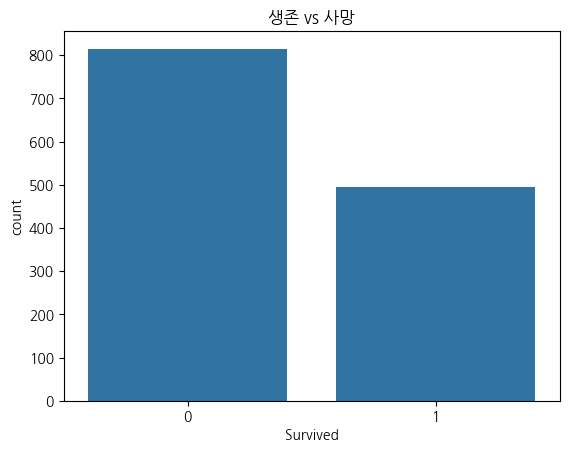

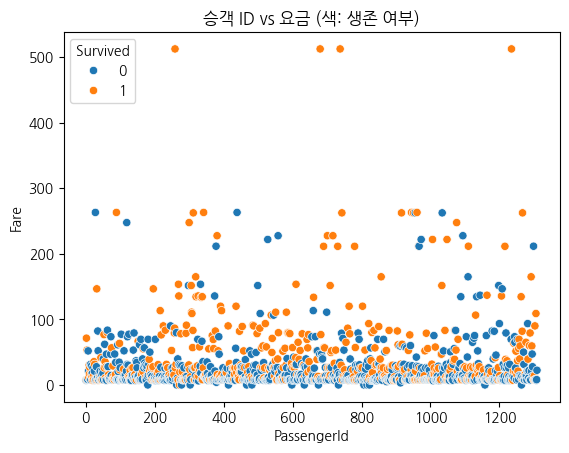

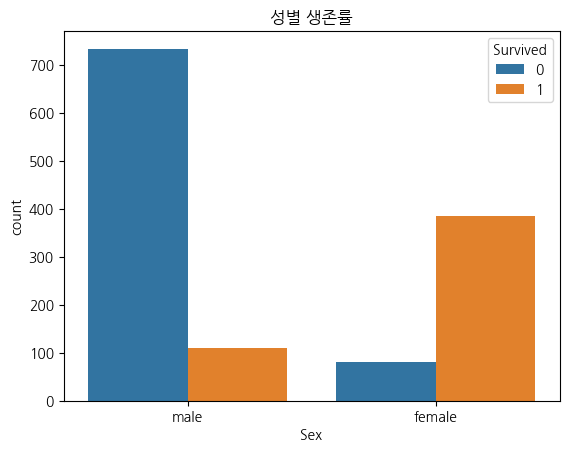

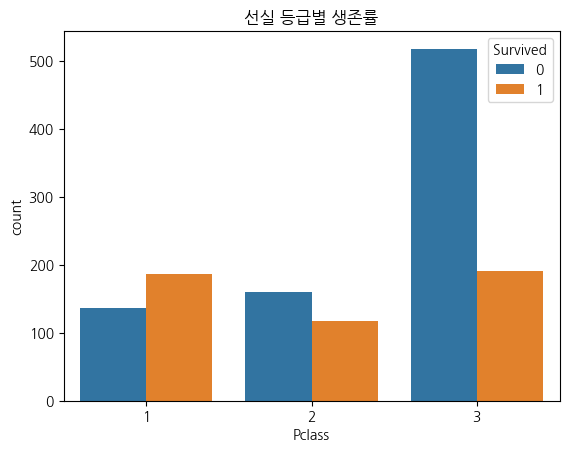

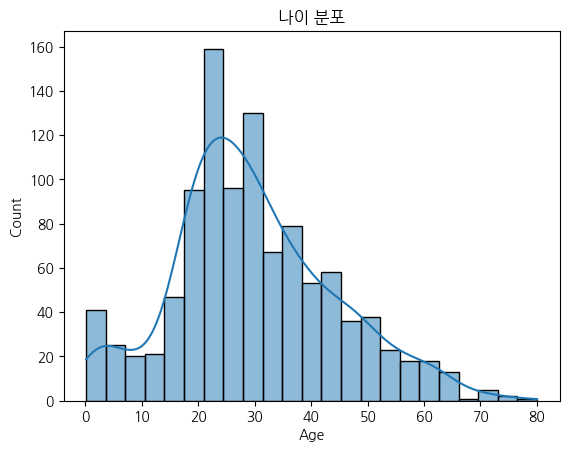

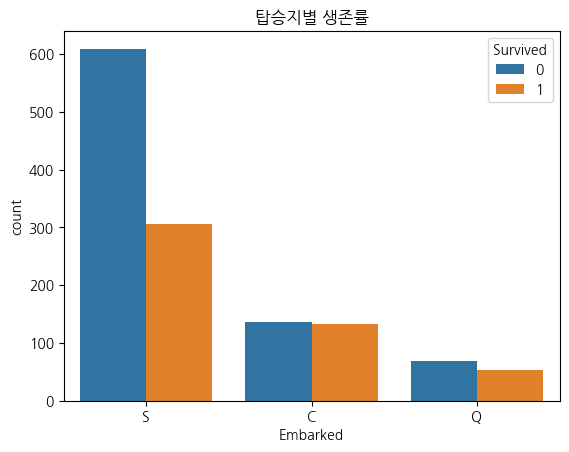

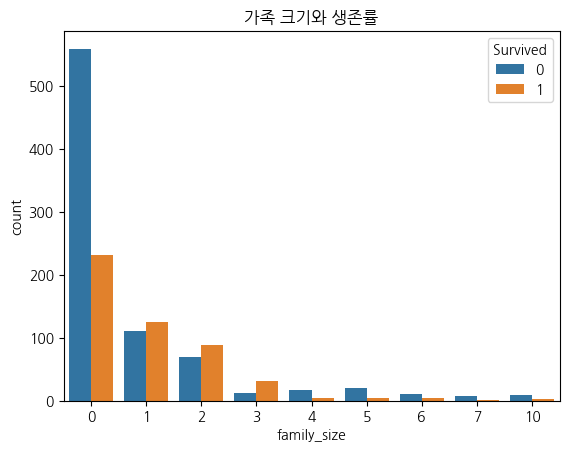

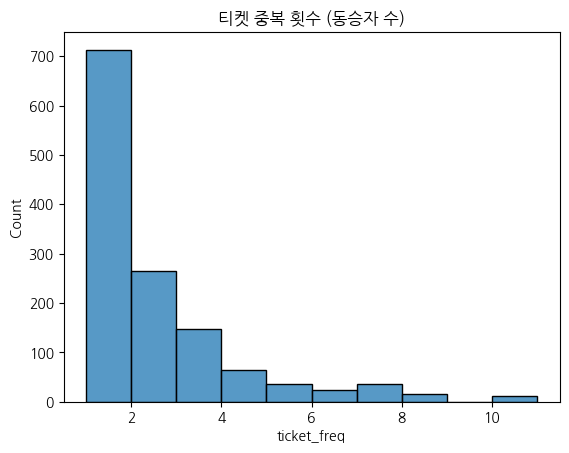

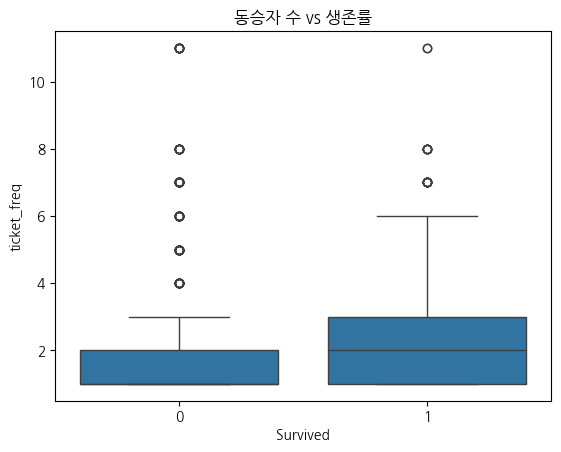

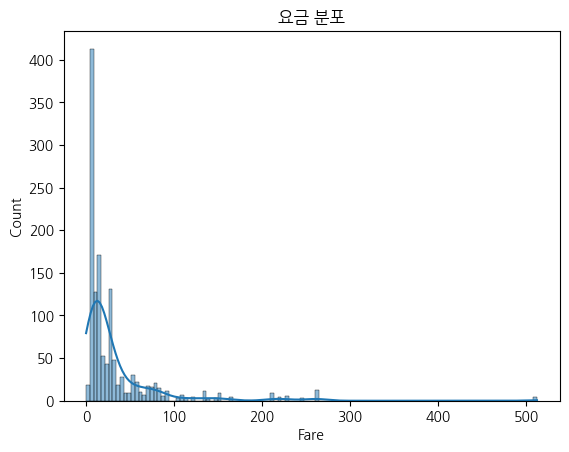

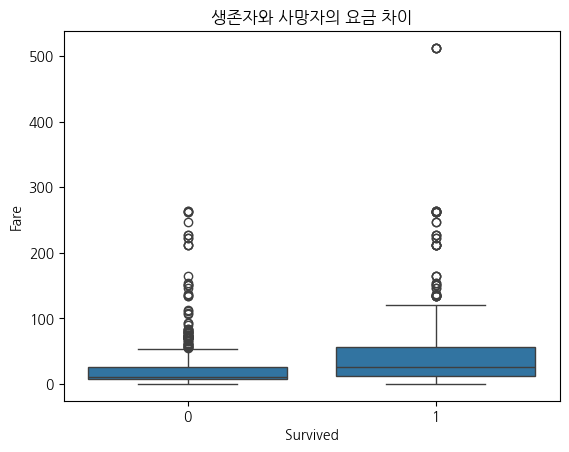

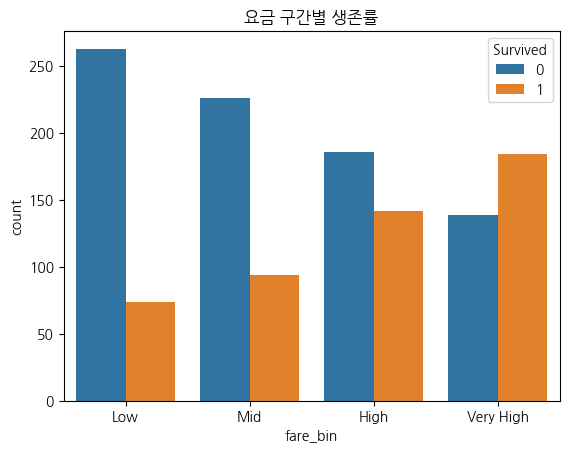

In [ ]:
# Step 1: 기본 셋업
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib


# 시각화 한글 깨짐 방지 (코랩용)
import matplotlib
matplotlib.rc('font', family='NanumGothic')

# Step 2: 파일 직접 업로드
from google.colab import files
uploaded = files.upload()

# 업로드한 파일명을 변수로 받아서 불러오기 (예: titanic1309.csv)
df = pd.read_csv('titanic1309.csv')  # 파일 이름 정확히 입력
df.head()

# Step 3: 데이터 구조 확인
df.info()
df.describe(include='all')
df.isnull().sum()

# Step 4: 변수별 EDA (탐색적 분석)
sns.countplot(x='Survived', data=df)
plt.title('생존 vs 사망')
plt.show()

sns.scatterplot(x='PassengerId', y='Fare', hue='Survived', data=df)
plt.title('승객 ID vs 요금 (색: 생존 여부)')
plt.show()


sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('성별 생존률')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('선실 등급별 생존률')
plt.show()

sns.histplot(df['Age'].dropna(), kde=True)
plt.title('나이 분포')
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('탑승지별 생존률')
plt.show()

df['family_size'] = df['SibSp'] + df['Parch']
sns.countplot(x='family_size', hue='Survived', data=df)
plt.title('가족 크기와 생존률')
plt.show()

df['ticket_freq'] = df.groupby('Ticket')['Ticket'].transform('count')

sns.histplot(df['ticket_freq'], bins=10)
plt.title('티켓 중복 횟수 (동승자 수)')
plt.show()

# 동승자 수가 생존에 영향을 미쳤을까?
sns.boxplot(x='Survived', y='ticket_freq', data=df)
plt.title('동승자 수 vs 생존률')
plt.show()

sns.histplot(df['Fare'], kde=True)
plt.title('요금 분포')
plt.show()

# 요금 vs 생존률 비교
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('생존자와 사망자의 요금 차이')
plt.show()

df['fare_bin'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])

sns.countplot(x='fare_bin', hue='Survived', data=df)
plt.title('요금 구간별 생존률')
plt.show()


# Step 5: 결측값 처리
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
